<a href="https://colab.research.google.com/github/KimJisanER/medical_ai/blob/main/cyclegan_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

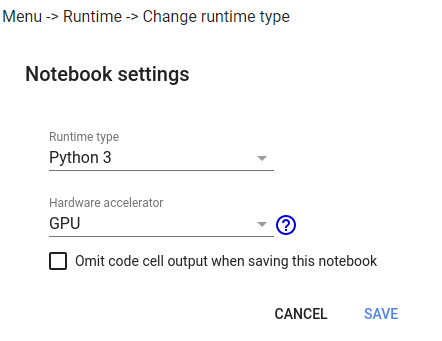

In [ ]:
#할당된 gpu 확인
!nvidia-smi

# 런타임 유형을 GPU로 설정하지 않으면 아래 문구가 뜸
#NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

Sat Aug  6 05:36:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#현재 경로에 있는 파일이 무엇이 있는지 확인해보기(아래 코드를 받고 난 후와 비교)
!ls

sample_data


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2452, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2452 (delta 0), reused 1 (delta 0), pack-reused 2451
Receiving objects: 100% (2452/2452), 8.18 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (1538/1538), done.


In [ ]:
#가져온 코드 확인하기
!ls

pytorch-CycleGAN-and-pix2pix  sample_data


In [ ]:
#작업 위치를 코드 아래와 옮기기
import os
os.chdir('./pytorch-CycleGAN-and-pix2pix/')

In [ ]:
#코드 폴더 내용 확인하기
!ls

CycleGAN.ipynb	docs		 LICENSE  pix2pix.ipynb     scripts   util
data		environment.yml  models   README.md	    test.py
datasets	imgs		 options  requirements.txt  train.py


In [ ]:
#필요한 패키지 설치하기
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676 kB 15.4 MB/s 
     |████████████████████████████████| 1.8 MB 54.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 157 kB 58.0 MB/s 
     |████████████████████████████████| 181 kB 71.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 157 kB 48.5 MB/s 
     |████████████████████████████████| 156 kB 68.1 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=141f6f8da9231a581e6c147894c15d456f0a7d16eb357ad64543d24160d13cfc
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=84c92b572931636cdd65a66ab20f0e4b557aeec0a99bc6b63693d4d51261f7df
  Stored in directory: /ro

In [ ]:
#핸즈온에 필요한 데이터 가져오기(데이터 권한: 프로메디우스(주)의 데이터이며, 본 핸즈온용으로 무료 배포)
!wget https://drive.promedius.dev/s/9PBjpRJ6YZadpXf/download/handson_cyclegan.zip

--2022-08-06 05:37:24--  https://drive.promedius.dev/s/9PBjpRJ6YZadpXf/download/handson_cyclegan.zip
Resolving drive.promedius.dev (drive.promedius.dev)... 112.169.219.65
Connecting to drive.promedius.dev (drive.promedius.dev)|112.169.219.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252561016 (241M) [application/zip]
Saving to: ‘handson_cyclegan.zip’

handson_cyclegan.zi 100%[===================>] 240.86M  27.5MB/s    in 9.3s    

2022-08-06 05:37:34 (25.8 MB/s) - ‘handson_cyclegan.zip’ saved [252561016/252561016]



In [ ]:
#받은 데이터 확인하기
!ls

CycleGAN.ipynb	environment.yml       models	     requirements.txt  util
data		handson_cyclegan.zip  options	     scripts
datasets	imgs		      pix2pix.ipynb  test.py
docs		LICENSE		      README.md      train.py


In [ ]:
#데이터 압축풀기(총 1100장의 256x256 pixel 해상도의 흉부 X-ray이미지이며 인공지능 생성모델로 만든 합성이미지임)
!unzip handson_cyclegan.zip

In [ ]:
#압축이 잘 풀렸는지 확인
!ls

CycleGAN.ipynb	environment.yml       LICENSE	     README.md	       train.py
data		handson_cyclegan      models	     requirements.txt  util
datasets	handson_cyclegan.zip  options	     scripts
docs		imgs		      pix2pix.ipynb  test.py


In [ ]:
folderlist=os.listdir('handson_cyclegan/promedius_cxr_for_cyclegan')#이미지 파일명을 imglist라는 변수에 담기
print(folderlist)#폴더 내용 확인

['testA', 'trainA', 'trainB', 'testB']


In [ ]:
testA_imglist=os.listdir(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testA'))#trainA 의 이미지 파일명 리스트 변수에 저장
testB_imglist=os.listdir(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testB'))#trainB 의 이미지 파일명 리스트 변수에 저장

In [ ]:
print('testA의 이미지 리스트 5개 출력')
print(testA_imglist[:5])

print('testB의 이미지 리스트 5개 출력')
print(testB_imglist[:5])

testA의 이미지 리스트 5개 출력
['promedius_synthesized_cxr_000738.png', 'promedius_synthesized_cxr_000245.png', 'promedius_synthesized_cxr_001044.png', 'promedius_synthesized_cxr_001327.png', 'promedius_synthesized_cxr_000465.png']
testB의 이미지 리스트 5개 출력
['promedius_synthesized_cxr_000738.png', 'promedius_synthesized_cxr_000245.png', 'promedius_synthesized_cxr_001044.png', 'promedius_synthesized_cxr_001327.png', 'promedius_synthesized_cxr_000465.png']


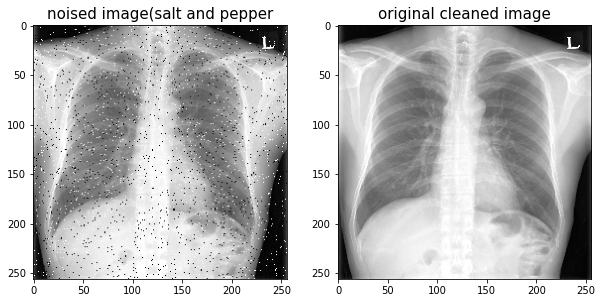

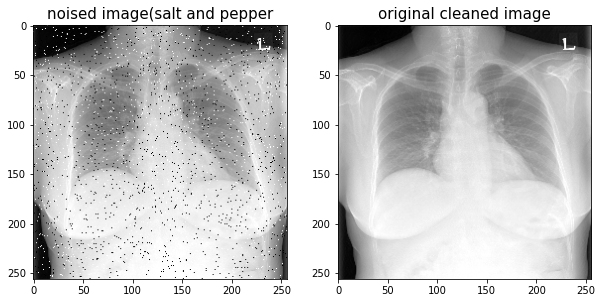

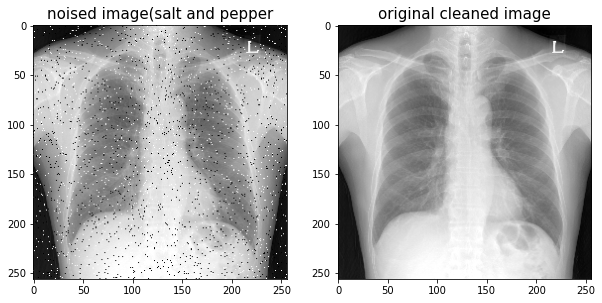

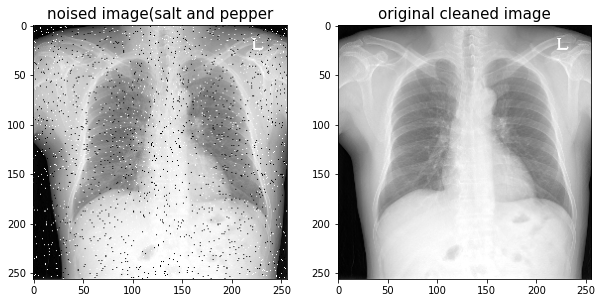

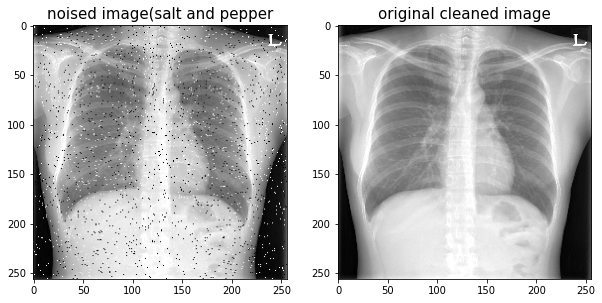

In [ ]:
import cv2
import matplotlib.pyplot as plt

for tmp in range(5):
  testA_img=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testA', testA_imglist[tmp]), 0)
  testB_img=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testB', testA_imglist[tmp]), 0)#파일명을 A와 같이 해서 비교.
  plt.figure(figsize=(10,10))
  plt.subplot(121)
  plt.title('noised image(salt and pepper', fontsize=15)
  plt.imshow(testA_img, cmap='gray')
  plt.subplot(122)
  plt.title('original cleaned image', fontsize=15)
  plt.imshow(testB_img, cmap='gray')
  plt.show()

In [ ]:
!python train.py --display_id 0 --dataroot handson_cyclegan/promedius_cxr_for_cyclegan --name promedius_cxr_for_cyclegan --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: handson_cyclegan/promedius_cxr_for_cyclegan	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest             

###학습이 진행되면 아래와 같이 로그가 남음

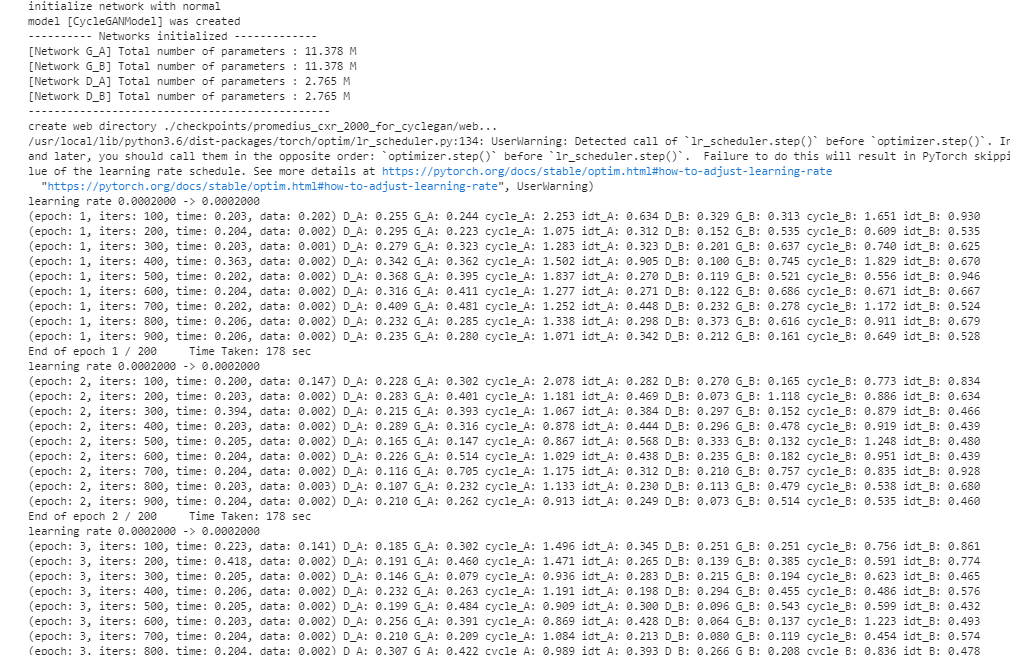

In [ ]:
import shutil
os.makedirs('handson_cyclegan/weights/promedius_cxr_for_cyclegan')
shutil.copy(os.path.join('handson_cyclegan/weights/latest_net_G.pth'), 'handson_cyclegan/weights/promedius_cxr_for_cyclegan')
!python test.py --dataroot handson_cyclegan/promedius_cxr_for_cyclegan/testA --name promedius_cxr_for_cyclegan --model test --checkpoints_dir 'handson_cyclegan/weights' --results_dir 'results'  --no_dropout --num_test 200

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: handson_cyclegan/weights      	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: handson_cyclegan/promedius_cxr_for_cyclegan/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
            

In [ ]:
#이미지 비교 metric 함수(mean squared error와 structural similarity index)
from skimage.metrics import structural_similarity as ssim

def mse(imageA, imageB):
    
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err
def compare_images(imageA, imageB):
    
    mse_value = mse(imageA, imageB)
    ssim_value = ssim(imageA, imageB)
    
    return mse_value, ssim_value

In [ ]:
os.listdir('results/promedius_cxr_for_cyclegan/test_latest')

['images', 'index.html']

In [ ]:
#테스트 이미지에 대해 MSE와 SSIM구하기
import glob
import numpy as np

real_images=glob.glob(os.path.join('results/promedius_cxr_for_cyclegan/test_latest/images', '*_real.png'))

mse_arr=[]
ssim_arr=[]
for tmp in range(len(real_images)):
    
    img_real=cv2.imread(real_images[tmp], 0)
    img_syn=cv2.imread(real_images[tmp].replace('real', 'fake'), 0)
    
    img_real_clean_pair=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan/testB', real_images[tmp].replace('_real', '').split('/')[-1]), 0)
    
    mse_v, ssim_v = compare_images(img_real_clean_pair, img_syn)
    
    print('MSE of paired image', round(mse_v, 2))
    print('SSIM of paired image', round((ssim_v*100.), 2))
    
    mse_arr.append(mse_v)
    ssim_arr.append(ssim_v)
    
    plt.figure(figsize=(15,10))
    plt.subplot(131)
    plt.title('input noisy image', fontsize=15)
    plt.imshow(img_real, cmap='gray')
    plt.subplot(132)
    plt.title('denoised image', fontsize=15)
    plt.imshow(img_syn, cmap='gray')
    plt.subplot(133)
    plt.title('input clean image', fontsize=15)
    plt.imshow(img_real_clean_pair, cmap='gray')
    plt.show()

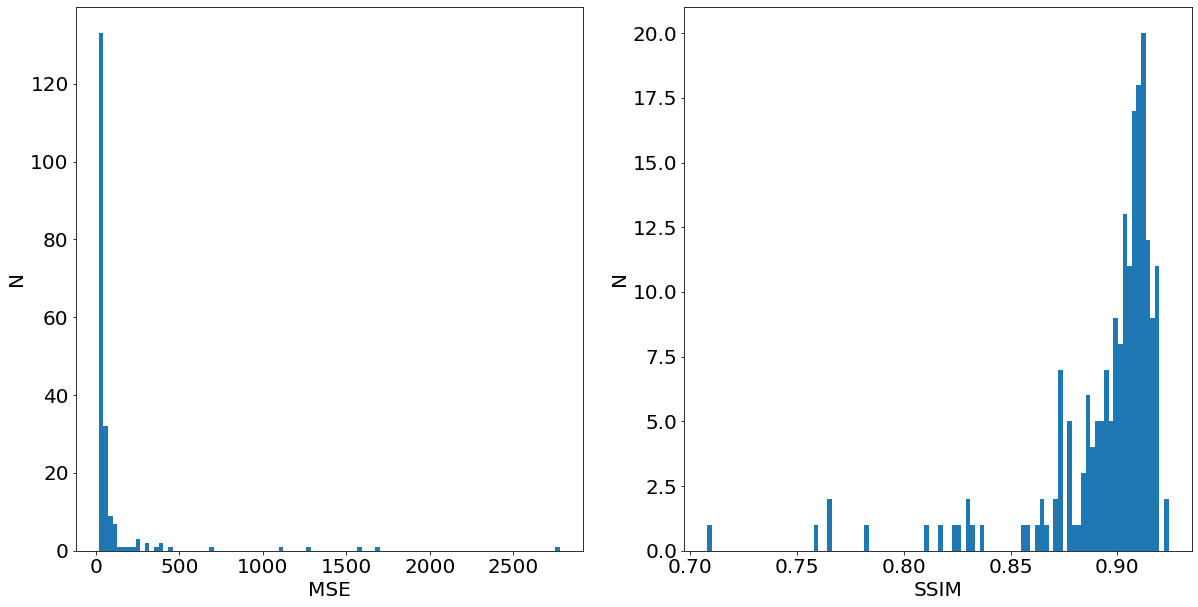

In [ ]:
#이미지 비교 metric MSE와 SSIM히스토그램 그려보기
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(mse_arr, bins=100)
plt.xlabel('MSE', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.subplot(122)
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.hist(ssim_arr, bins=100)     
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

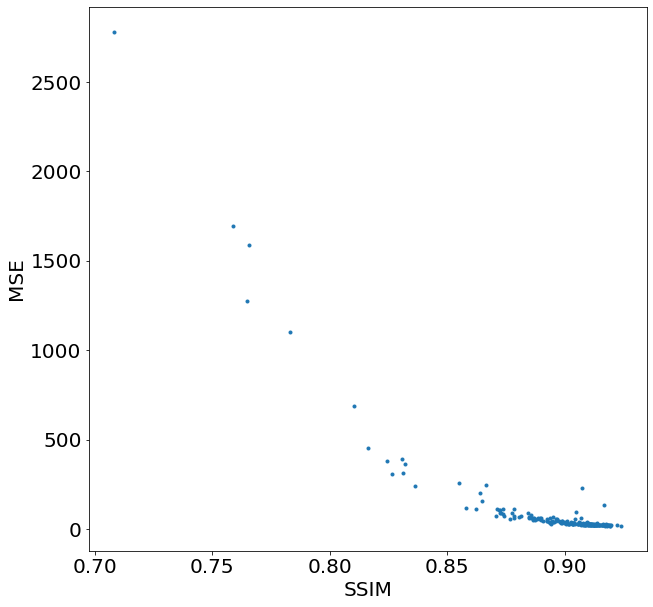

In [ ]:
#이미지 비교 metric MSE와 SSIM상관관계 그려보기(MSE는 로그스케일로 그려보기)
plt.figure(figsize=(10,10))
plt.plot(ssim_arr, mse_arr, '.')
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

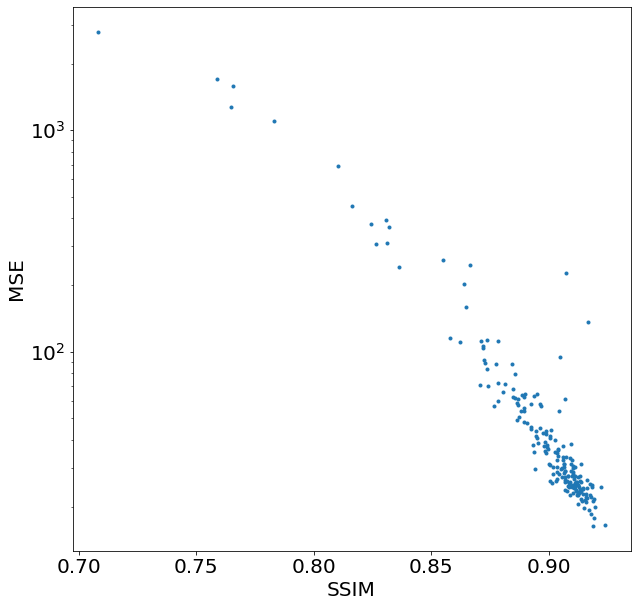

In [ ]:
#이미지 비교 metric MSE와 SSIM상관관계 그려보기(MSE는 로그스케일로 그려보기)
plt.figure(figsize=(10,10))
plt.plot(ssim_arr, mse_arr, '.')
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yscale("log")
plt.show()

In [ ]:
#MSE가 1000보다 큰 것에 대한 이미지 리스트 찾기
mse_arr_np=np.asarray(mse_arr)
mse_over_1000_list=list(np.where(mse_arr_np > 1000))[0]
print(mse_over_1000_list)

[103 134 150 172 177]


In [ ]:
#MSE가 20보다 작은 것에 대한 이미지 리스트 찾기
mse_under_20_list=list(np.where(mse_arr_np < 20))[0]
print(mse_under_20_list)

[ 20  25  36  53  58  80 112]


MSE of paired image 19.31
SSIM of paired image 91.69


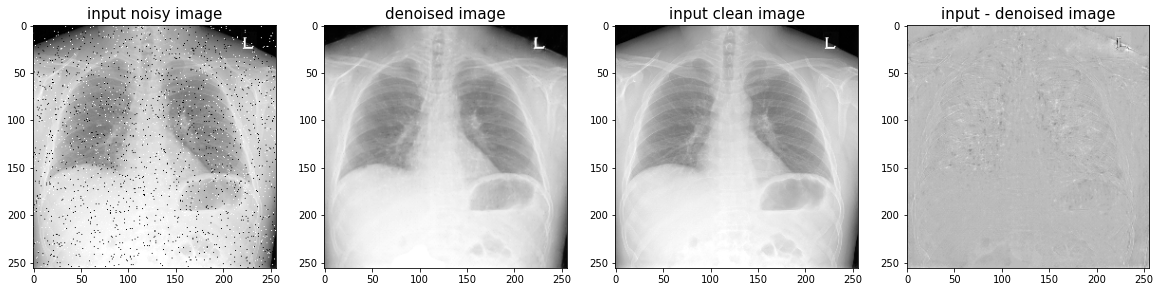

MSE of paired image 16.53
SSIM of paired image 92.4


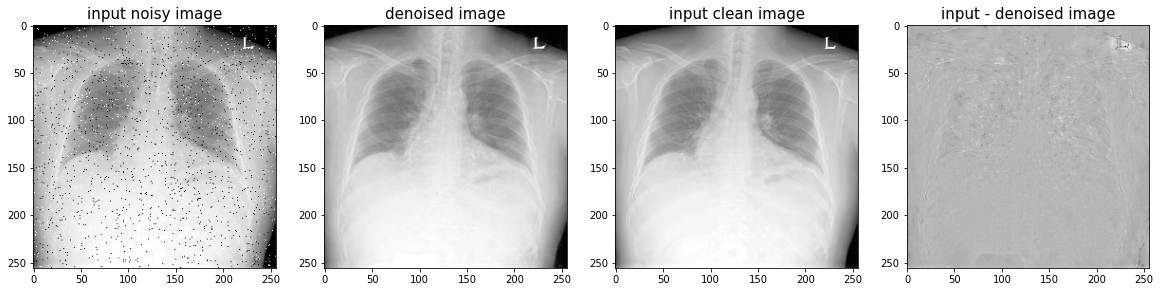

MSE of paired image 20.0
SSIM of paired image 91.96


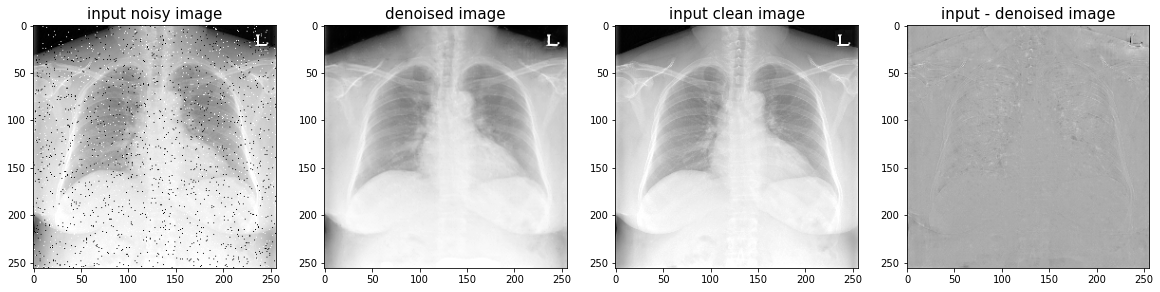

MSE of paired image 18.6
SSIM of paired image 91.81


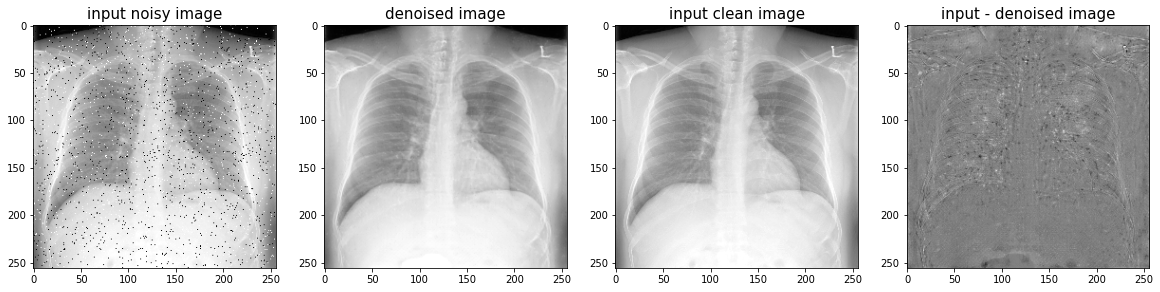

MSE of paired image 17.85
SSIM of paired image 91.92


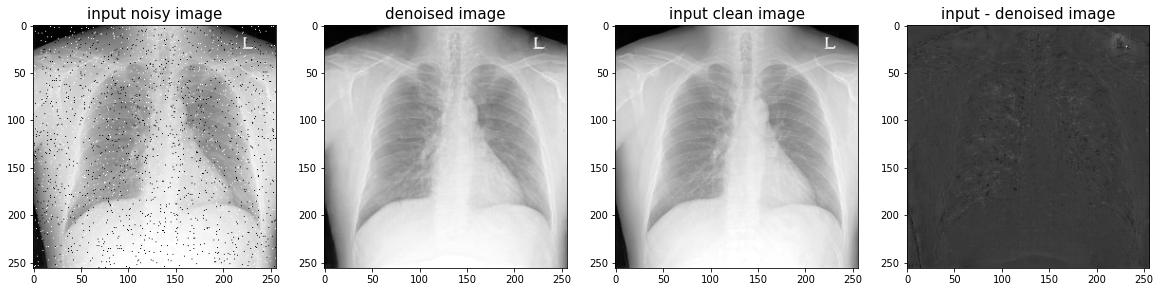

MSE of paired image 19.64
SSIM of paired image 91.51


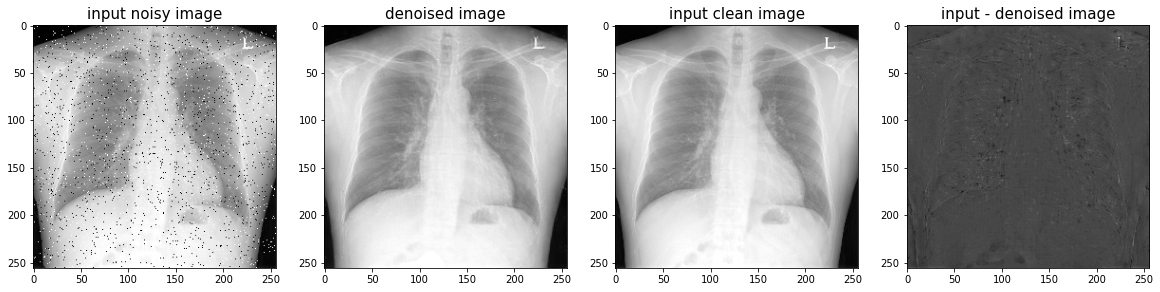

MSE of paired image 16.33
SSIM of paired image 91.9


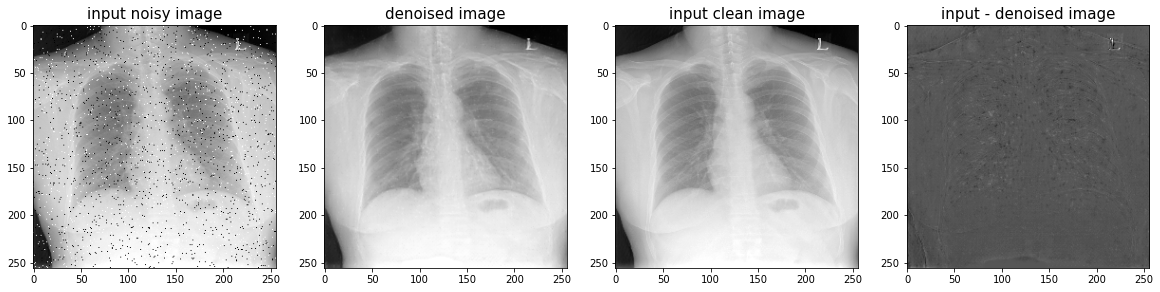

In [ ]:
#MSE가 1000보다 큰 것에 대한 이미지 그려서, 왜 큰 차이가 나는지 visual examination해보기
for tmp in range(len(mse_under_20_list)):
    
    img_real=cv2.imread(real_images[mse_under_20_list[tmp]], 0)
    img_syn=cv2.imread(real_images[mse_under_20_list[tmp]].replace('real', 'fake'), 0)
    
    img_real_clean_pair=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan/testB', real_images[mse_under_20_list[tmp]].replace('_real', '').split('/')[-1]), 0)
    
    mse_v, ssim_v = compare_images(img_real_clean_pair, img_syn)
    
    print('MSE of paired image', round(mse_v, 2))
    print('SSIM of paired image', round((ssim_v*100.), 2))
    
    plt.figure(figsize=(20,10))
    plt.subplot(141)
    plt.title('input noisy image', fontsize=15)
    plt.imshow(img_real, cmap='gray')
    plt.subplot(142)
    plt.title('denoised image', fontsize=15)
    plt.imshow(img_syn, cmap='gray')
    plt.subplot(143)
    plt.title('input clean image', fontsize=15)
    plt.imshow(img_real_clean_pair, cmap='gray')
    plt.subplot(144)
    plt.title('input - denoised image', fontsize=15)
    plt.imshow(img_real_clean_pair.astype('float32')- img_syn.astype('float32'), cmap='gray')
    plt.show()

MSE of paired image 1276.71
SSIM of paired image 76.47


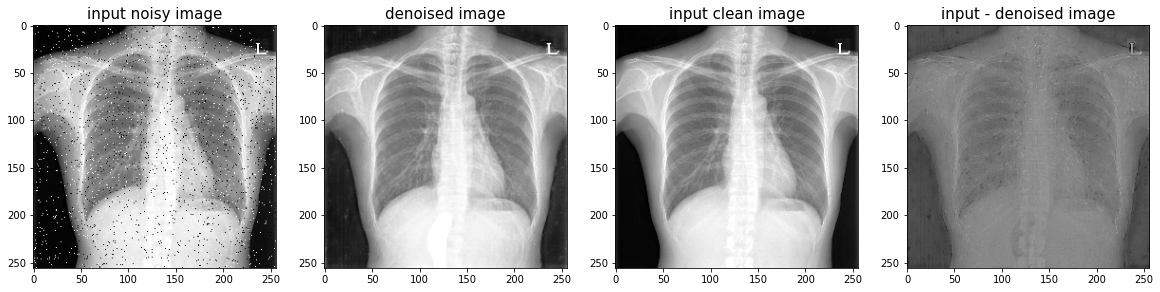

MSE of paired image 1586.99
SSIM of paired image 76.57


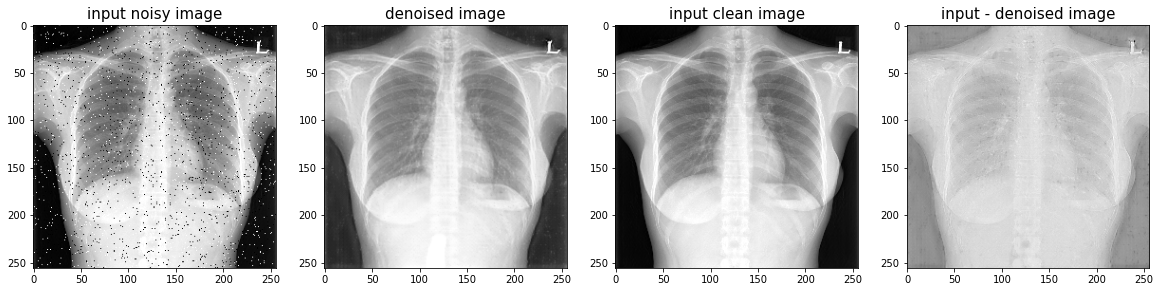

MSE of paired image 1100.05
SSIM of paired image 78.31


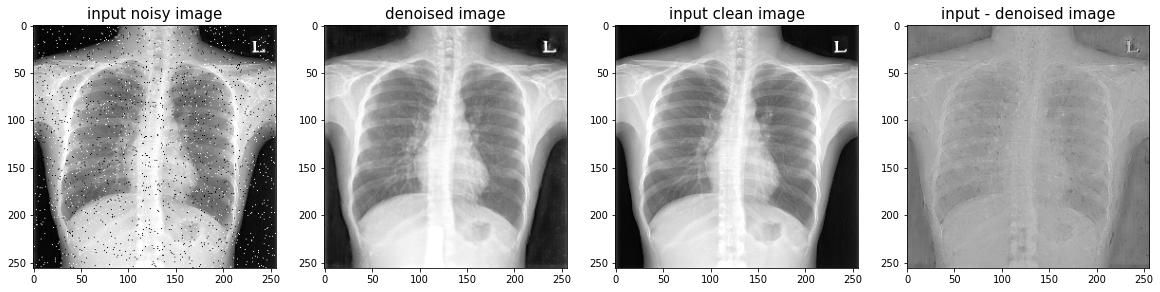

MSE of paired image 1695.45
SSIM of paired image 75.88


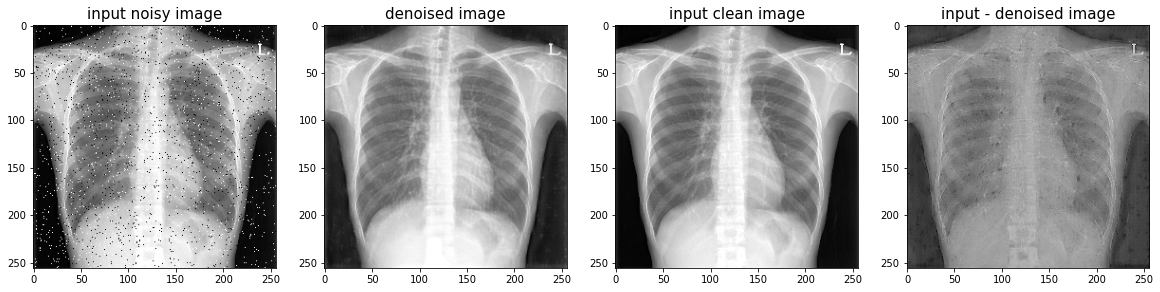

MSE of paired image 2780.17
SSIM of paired image 70.82


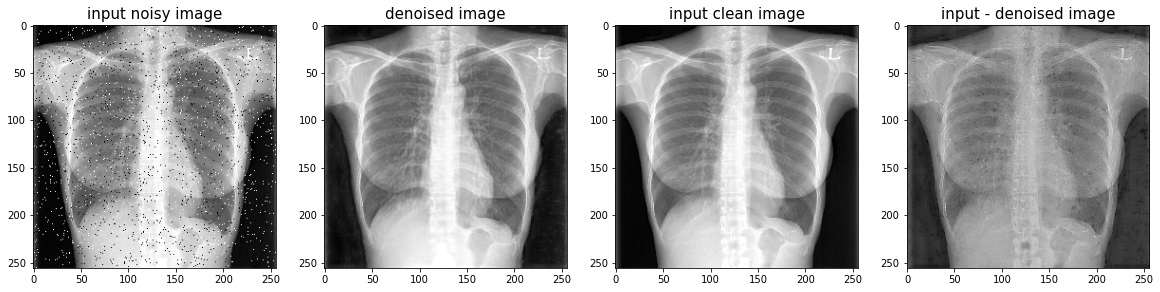

In [ ]:
#MSE가 1000보다 큰 것에 대한 이미지 그려서, 왜 큰 차이가 나는지 visual examination해보기
for tmp in range(len(mse_over_1000_list)):
    
    img_real=cv2.imread(real_images[mse_over_1000_list[tmp]], 0)
    img_syn=cv2.imread(real_images[mse_over_1000_list[tmp]].replace('real', 'fake'), 0)
    
    img_real_clean_pair=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan/testB', real_images[mse_over_1000_list[tmp]].replace('_real', '').split('/')[-1]), 0)
    
    mse_v, ssim_v = compare_images(img_real_clean_pair, img_syn)
    
    print('MSE of paired image', round(mse_v, 2))
    print('SSIM of paired image', round((ssim_v*100.), 2))
    
    plt.figure(figsize=(20,10))
    plt.subplot(141)
    plt.title('input noisy image', fontsize=15)
    plt.imshow(img_real, cmap='gray')
    plt.subplot(142)
    plt.title('denoised image', fontsize=15)
    plt.imshow(img_syn, cmap='gray')
    plt.subplot(143)
    plt.title('input clean image', fontsize=15)
    plt.imshow(img_real_clean_pair, cmap='gray')
    plt.subplot(144)
    plt.title('input - denoised image', fontsize=15)
    plt.imshow(img_real_clean_pair.astype('float32')- img_syn.astype('float32'), cmap='gray')
    plt.show()